<a href="https://colab.research.google.com/github/najiyak23/Customer-Segmentation-Project/blob/main/ClusterAnalysis_Kmean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from sklearn.cluster import KMeans
from sklearn.metrics  import silhouette_score
from sklearn.preprocessing import StandardScaler
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("omerparlak/online-retail-ll")

print("Path to dataset files:", path)

# Find the Excel file within the downloaded directory
for filename in os.listdir(path):
    if filename.endswith((".xlsx", ".xls")):  # Check for common Excel extensions
        excel_file = os.path.join(path, filename)  # Construct full file path
        break  # Stop searching once found

# Now use the 'excel_file' variable to read the data
df = pd.read_excel(excel_file, sheet_name=0)  # Changed 'path' to 'excel_file'
df.head(10)

100%|██████████| 43.5M/43.5M [00:00<00:00, 103MB/s] 

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/omerparlak/online-retail-ll/versions/1


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [ ]:
#show all columns on output
pd.set_option('display.max_columns', 999)
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:
df.shape

(525461, 8)

In [ ]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [ ]:
df.dtypes

,0
Invoice,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
Price,float64
Customer ID,float64
Country,object


In [ ]:
df.describe(include='object')

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


In [ ]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


In [ ]:
df.duplicated().sum()

6865

In [ ]:
df[df['Customer ID'].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


In [ ]:
null_customer_id_df = df[df['Customer ID'].isna()]
shape_of_nulls = null_customer_id_df.shape
print("Shape of null values in 'Customer ID':", shape_of_nulls)

Shape of null values in 'Customer ID': (107927, 8)


In [ ]:
df[df['Quantity']<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.0,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.0,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.0,United Kingdom


In [ ]:
df['Invoice']=df['Invoice'].astype(str)
df[df['Invoice'].str.match('^\\d{6}$')==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.0,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.0,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.0,United Kingdom


In [ ]:
df['Invoice'].str.replace('[0-9]','',regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [ ]:
unique_chars= set()
for invoice in df['Invoice']:
    for char in invoice:
        if not char.isdigit():
            unique_chars.add(char)
#The following two lines were indented and are now aligned with the inner for loop
    # if not char.isdigit():
    #     unique_chars.add(char)
print(unique_chars)

{'A', 'C'}


In [ ]:
df[df['Invoice'].str.startswith('A')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [ ]:
df['StockCode']=df['StockCode'].astype(str)
df[df['StockCode'].str.match('^\\d{5}$')==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.0,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.0,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.0,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.0,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.0,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.0,United Kingdom


# **Data** **Cleaning**

In [ ]:
df['StockCode']=df['StockCode'].astype(str)
df[(df['StockCode'].str.match('^\\d{5}$')==False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')==False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
...,...,...,...,...,...,...,...,...
524776,538147,M,Manual,1,2010-12-09 16:11:00,15.00,13090.0,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [ ]:
df['StockCode']=df['StockCode'].astype(str)
df[(df['StockCode'].str.match('^\\d{5}$')==False) & (df['StockCode'].str.match('^\\d{5}[a-zA-Z]+$')==False)]['StockCode'].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

In [ ]:
df[df['StockCode'].str.contains('^DOT')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom
2571,489602,DOT,DOTCOM POSTAGE,1,2009-12-01 14:45:00,59.35,NaN,United Kingdom
2619,489603,DOT,DOTCOM POSTAGE,1,2009-12-01 14:46:00,42.39,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
524272,538071,DOT,DOTCOM POSTAGE,1,2010-12-09 14:09:00,885.94,NaN,United Kingdom
524887,538148,DOT,DOTCOM POSTAGE,1,2010-12-09 16:26:00,547.32,NaN,United Kingdom
525000,538149,DOT,DOTCOM POSTAGE,1,2010-12-09 16:27:00,620.68,NaN,United Kingdom
525126,538153,DOT,DOTCOM POSTAGE,1,2010-12-09 16:31:00,822.94,NaN,United Kingdom


In [ ]:
df[df['StockCode'].str.contains('^POST')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.0,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.0,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.0,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.0,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.0,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.0,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.0,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.0,France


In [ ]:
df[df['StockCode'].str.contains('^D$')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.0,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.0,United Kingdom
24675,C491428,D,Discount,-1,2009-12-10 20:23:00,9.10,15494.0,United Kingdom
29414,C491845,D,Discount,-1,2009-12-14 14:54:00,1.59,NaN,United Kingdom
29958,C491962,D,Discount,-1,2009-12-14 16:38:00,0.59,13206.0,United Kingdom
...,...,...,...,...,...,...,...,...
501237,536158,D,Discount,1,2010-11-30 11:57:00,32.29,13634.0,United Kingdom
503073,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
511955,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom
517436,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom


In [ ]:
df[df['StockCode'].str.contains('^PADS')]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.001,16705.0,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.001,13583.0,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.001,17350.0,United Kingdom
79794,496643,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-03 11:58:00,0.001,13408.0,United Kingdom
90798,497935,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-15 10:47:00,0.001,13408.0,United Kingdom
97716,498562,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-21 12:03:00,0.001,15182.0,United Kingdom
101718,499056,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-24 13:46:00,0.001,13765.0,United Kingdom
104480,499399,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-26 13:26:00,0.001,14459.0,United Kingdom
123947,501176,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-03-15 11:00:00,0.001,14857.0,United Kingdom
156809,504332,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-04-12 16:30:00,0.001,12671.0,Germany


In [ ]:
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [ ]:
unique_descriptions = df['Description'].unique()

print(unique_descriptions)

['15CM CHRISTMAS GLASS BALL 20 LIGHTS' 'PINK CHERRY LIGHTS'
 ' WHITE CHERRY LIGHTS' ... '*Boombox Ipod Classic' 'faulty'
 'Dotcom sales']


In [ ]:
# Assuming your DataFrame is named 'df'
unique_descriptions = df['Description'].unique()

print("Shape of unique descriptions:", unique_descriptions.shape)

Shape of unique descriptions: (4682,)


# **REAL DATA CLEANING**

In [ ]:
cleaned_df=df.copy()

In [ ]:
cleaned_df['Invoice']=cleaned_df['Invoice'].astype('str')
mask=(
    (cleaned_df['Invoice'].str.match('^\\d{6}$')==True)
)
cleaned_df=cleaned_df[mask]
cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$") == True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$") == True)
    | (cleaned_df["StockCode"].str.match("^PADS$") == True)
)

cleaned_df = cleaned_df[mask]

cleaned_df

<ipython-input-30-f863b8e6c7af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,512796.000000,512796,512796.000000,406337.000000
mean,11.001279,2010-06-28 18:26:52.709732352,3.391447,15373.632992
min,-9600.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,1.000000,2010-03-21 13:27:00,1.250000,14004.000000
50%,3.000000,2010-07-06 14:25:00,2.100000,15326.000000
75%,10.000000,2010-10-15 14:50:00,4.210000,16814.000000
max,19152.000000,2010-12-09 20:01:00,1157.150000,18287.000000
std,104.352433,NaN,5.067864,1677.365907


In [ ]:
cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
cleaned_df.dropna(subset=['Customer ID'],inplace=True)

<ipython-input-33-3cd465052f0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=['Customer ID'],inplace=True)


In [ ]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.000000,406337,406337.000000,406337.000000
mean,13.619099,2010-07-01 10:11:06.543288320,2.991462,15373.632992
min,1.000000,2009-12-01 07:45:00,0.000000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14004.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,97.000659,NaN,4.285876,1677.365907


In [ ]:
cleaned_df[cleaned_df['Price']==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.0,16126.0,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.0,15658.0,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.0,14108.0,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.0,15070.0,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.0,18071.0,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.0,14258.0,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.0,12417.0,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.0,16858.0,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.0,13047.0,United Kingdom


In [ ]:
len(cleaned_df[cleaned_df['Price']==0])

28

In [ ]:
cleaned_df=cleaned_df[cleaned_df['Price']>0]

In [ ]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406309.000000,406309,406309.000000,406309.000000
mean,13.617924,2010-07-01 10:14:25.869572352,2.991668,15373.722268
min,1.000000,2009-12-01 07:45:00,0.001000,12346.000000
25%,2.000000,2010-03-26 14:01:00,1.250000,14006.000000
50%,5.000000,2010-07-09 15:48:00,1.950000,15326.000000
75%,12.000000,2010-10-14 17:09:00,3.750000,16814.000000
max,19152.000000,2010-12-09 20:01:00,295.000000,18287.000000
std,96.998833,NaN,4.285951,1677.329470


In [ ]:
len(cleaned_df[cleaned_df['Price']==0])

0

In [ ]:
len(cleaned_df)/len(df)

0.7732429238325965

Dropped 23% of Records ⏫

# **Feature** **Engineering**

In [ ]:
cleaned_df['SalesLineTotal']=cleaned_df['Quantity']*cleaned_df['Price']
cleaned_df

<ipython-input-41-0dfee5fdd89c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['SalesLineTotal']=cleaned_df['Quantity']*cleaned_df['Price']


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,7.50


In [ ]:
aggregated_df = cleaned_df.groupby(by='Customer ID', as_index= False) \
      .agg(
       MonetaryValue=('SalesLineTotal', 'sum'),
       Frequency=('Invoice', 'nunique'),
       LastInvoiceDate=('InvoiceDate', 'max')
   )
aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.0,169.36,2,2010-06-28 13:53:00
1,12347.0,1323.32,2,2010-12-07 14:57:00
2,12348.0,221.16,1,2010-09-27 14:59:00
3,12349.0,2221.14,2,2010-10-28 08:23:00
4,12351.0,300.93,1,2010-11-29 15:23:00
...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00
4281,18284.0,411.68,1,2010-10-04 11:33:00
4282,18285.0,377.00,1,2010-02-17 10:24:00
4283,18286.0,1246.43,2,2010-08-20 11:57:00


In [ ]:
max_invoice_date = aggregated_df['LastInvoiceDate'].max()
max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [ ]:
aggregated_df['Recency'] = (max_invoice_date - aggregated_df['LastInvoiceDate']).dt.days
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.0,169.36,2,2010-06-28 13:53:00,164
1,12347.0,1323.32,2,2010-12-07 14:57:00,2
2,12348.0,221.16,1,2010-09-27 14:59:00,73
3,12349.0,2221.14,2,2010-10-28 08:23:00,42
4,12351.0,300.93,1,2010-11-29 15:23:00,10


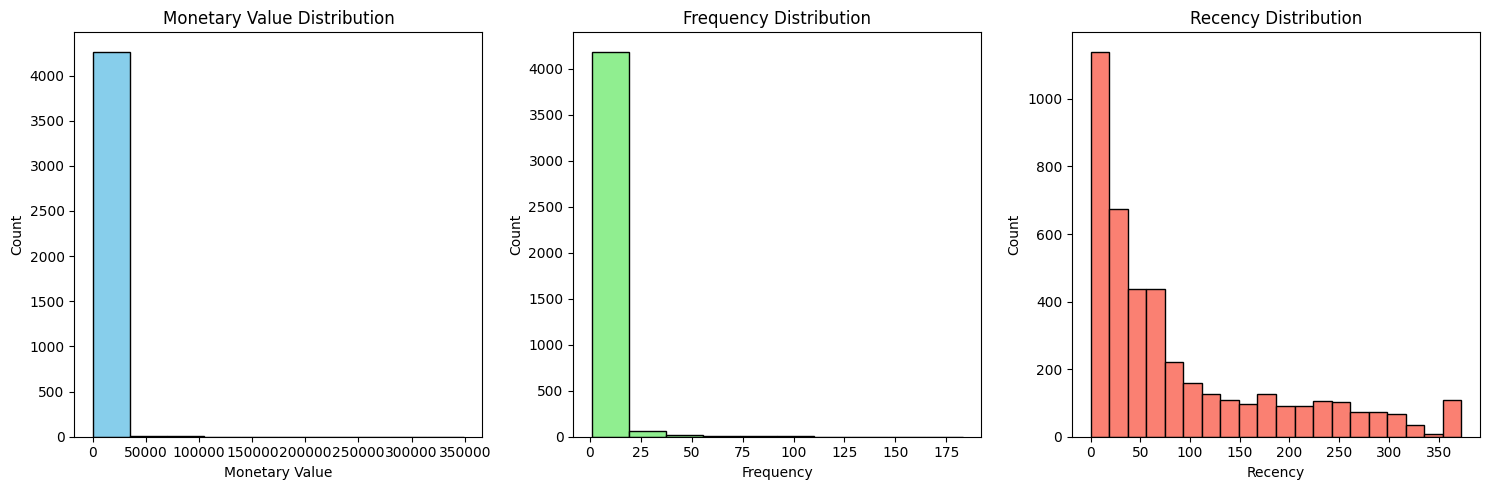

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

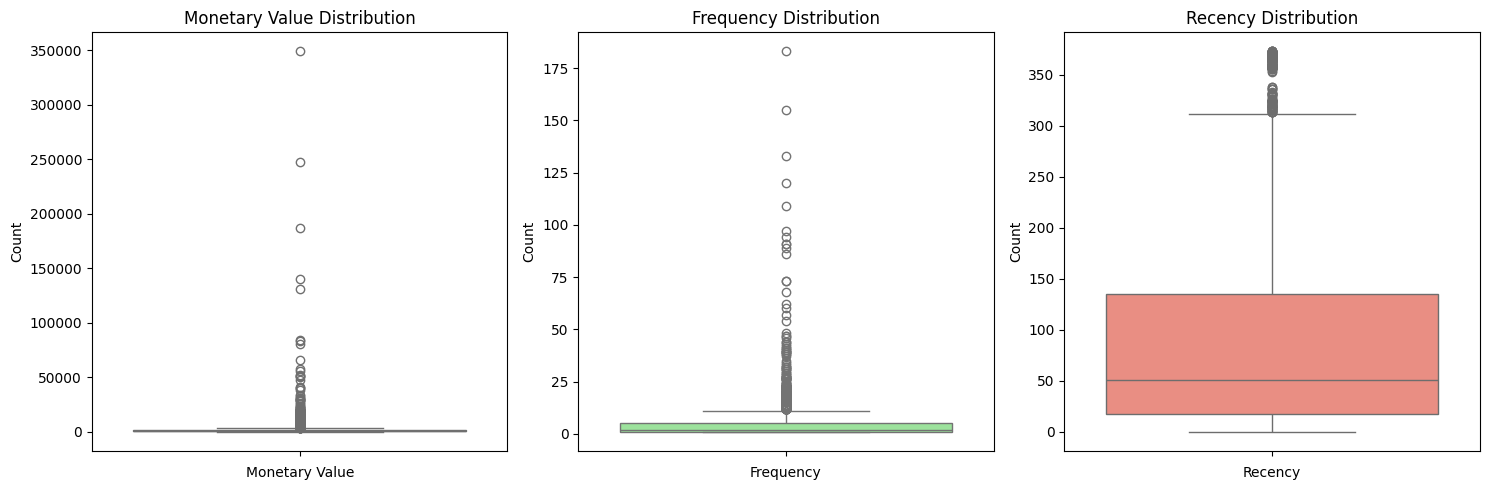

In [ ]:
import seaborn as sns
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
sns.boxplot(aggregated_df['MonetaryValue'],  color='skyblue')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
sns.boxplot(aggregated_df['Frequency'],color='lightgreen')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
sns.boxplot(aggregated_df['Recency'], color='salmon')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
M_Q1=aggregated_df['MonetaryValue'].quantile(0.25)
M_Q3=aggregated_df['MonetaryValue'].quantile(0.75)
M_IQR=M_Q3-M_Q1

monetary_outliers_df = aggregated_df[(aggregated_df['MonetaryValue'] < M_Q1 - 1.5 * M_IQR) | (aggregated_df['MonetaryValue'] > M_Q3 + 1.5 * M_IQR)]
monetary_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.000000,423.000000,423.000000,423,423.000000
mean,15103.040189,12188.101740,17.167849,2010-11-09 12:26:02.978723328,30.035461
min,12357.000000,3802.040000,1.000000,2009-12-10 18:03:00,0.000000
25%,13622.000000,4605.940000,8.000000,2010-11-08 13:17:30,3.000000
50%,14961.000000,6191.320000,12.000000,2010-11-26 12:19:00,13.000000
75%,16692.000000,10273.235000,18.000000,2010-12-06 10:34:30,31.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,364.000000
std,1728.661406,25830.851045,19.729755,NaN,51.541004


In [ ]:
F_Q1 = aggregated_df['Frequency'].quantile(0.25)
F_Q3 = aggregated_df['Frequency'].quantile(0.75)
F_IQR = F_Q3 - F_Q1

frequency_outliers_df = aggregated_df[(aggregated_df['Frequency'] > (F_Q3 + 1.5 * F_IQR)) | (aggregated_df['Frequency'] < (F_Q1 - 1.5 * F_IQR))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.000000,279.000000,279.000000,279,279.000000
mean,15352.655914,14409.714932,23.810036,2010-11-23 11:06:20.645161216,16.089606
min,12437.000000,1094.390000,12.000000,2010-05-12 16:51:00,0.000000
25%,13800.000000,4331.560500,13.000000,2010-11-20 13:14:30,2.000000
50%,15465.000000,6615.770000,17.000000,2010-12-02 10:46:00,7.000000
75%,16828.500000,11692.405000,23.000000,2010-12-07 11:08:30,19.000000
max,18260.000000,349164.350000,183.000000,2010-12-09 19:32:00,211.000000
std,1748.429987,31381.736785,21.932937,NaN,26.589117


In [ ]:
non_outliers_df = aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index))]

non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.000000,3809.000000,3809.000000,3809,3809.000000
mean,15376.482804,885.502197,2.863481,2010-09-03 11:16:46.516146176,97.082174
min,12346.000000,1.550000,1.000000,2009-12-01 10:49:00,0.000000
25%,13912.000000,279.910000,1.000000,2010-07-08 14:48:00,22.000000
50%,15389.000000,588.050000,2.000000,2010-10-12 16:25:00,58.000000
75%,16854.000000,1269.050000,4.000000,2010-11-17 13:14:00,154.000000
max,18287.000000,3788.210000,11.000000,2010-12-09 20:01:00,373.000000
std,1693.199806,817.672283,2.243748,NaN,98.111495


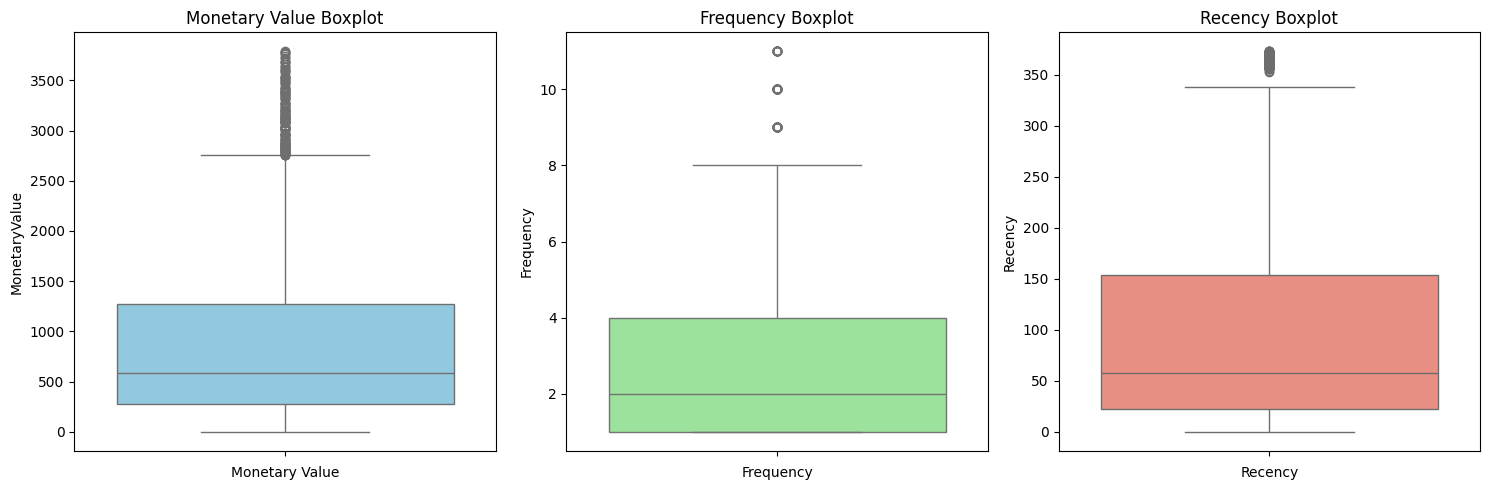

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_outliers_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=non_outliers_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=non_outliers_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

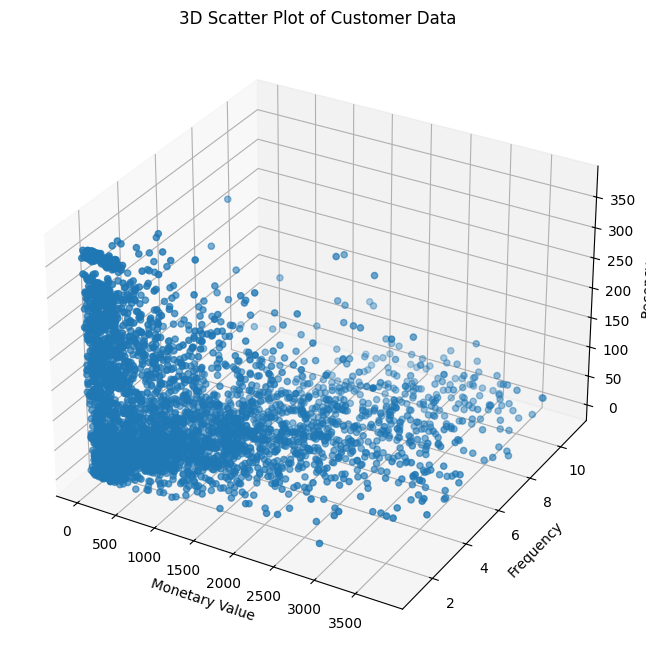

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(non_outliers_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.5355144 , -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488781,  0.50659348, -0.81634357]])

In [ ]:
scaled_data_df = pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,-0.875945,-0.384889,0.682149
1,0.535514,-0.384889,-0.969251
2,-0.812586,-0.830631,-0.245489
3,1.633678,-0.384889,-0.561498
4,-0.715016,-0.830631,-0.887700
...,...,...,...
4280,-0.298120,1.398076,-0.816344
4281,-0.579553,-0.830631,-0.316846
4282,-0.621972,-0.830631,2.017539
4283,0.441467,-0.384889,0.141876


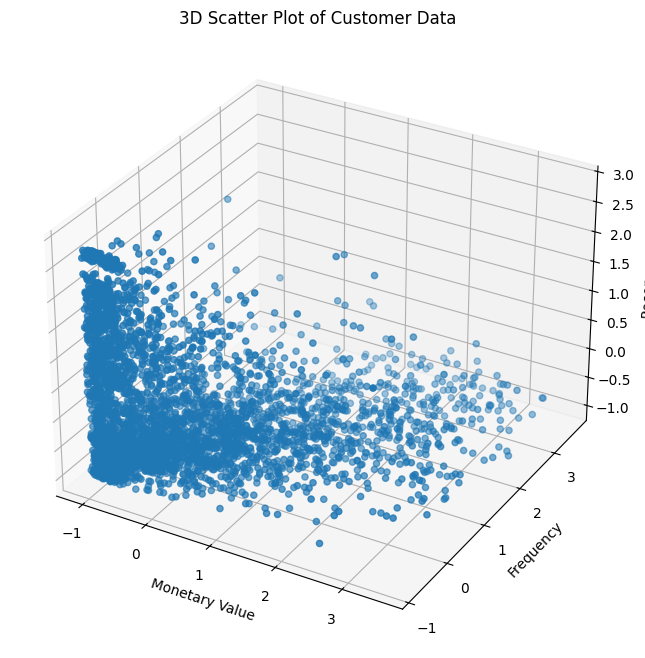

In [ ]:
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

# **KMean Clustering**

In [ ]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics  import silhouette_score

max_k = 12
inertia =[]
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    inertia.append(kmeans.inertia_)
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)
    # removed the duplicated append here --> inertia.append(kmeans.inertia_)

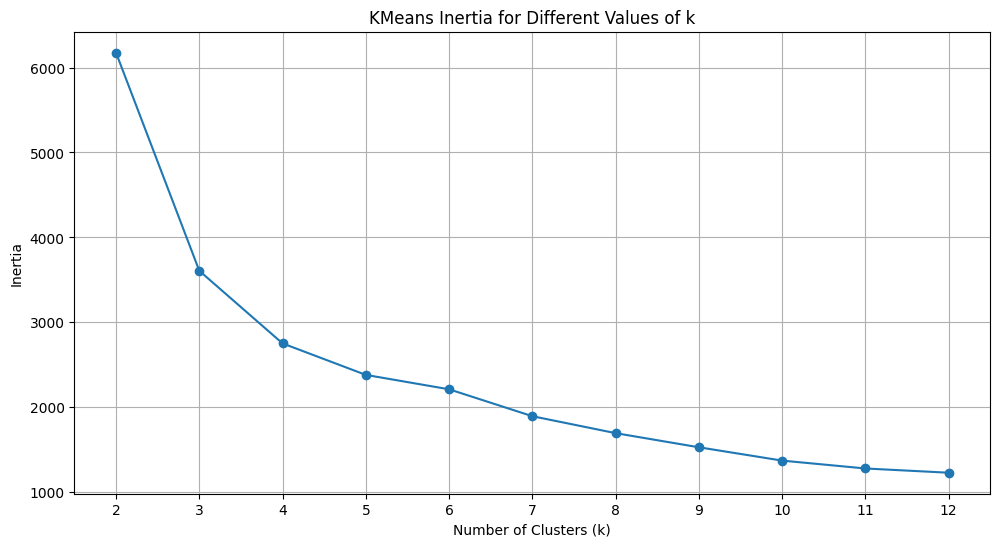

In [ ]:
plt.figure(figsize=(26, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)


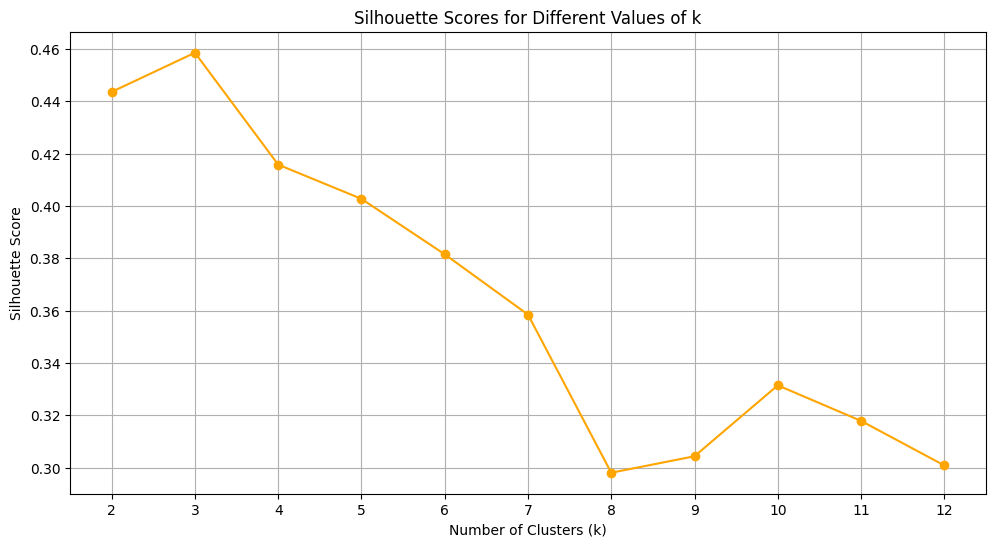

In [ ]:
plt.figure(figsize=(26, 6))
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

In [ ]:
k_means = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_labels = k_means.fit_predict(scaled_data_df)
cluster_labels

array([1, 0, 2, ..., 1, 0, 0], dtype=int32)

In [ ]:
non_outliers_df["Cluster"] = cluster_labels

non_outliers_df

<ipython-input-59-c531f568f2b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["Cluster"] = cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4280,18283.0,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.0,411.68,1,2010-10-04 11:33:00,66,2
4282,18285.0,377.00,1,2010-02-17 10:24:00,295,1
4283,18286.0,1246.43,2,2010-08-20 11:57:00,111,0


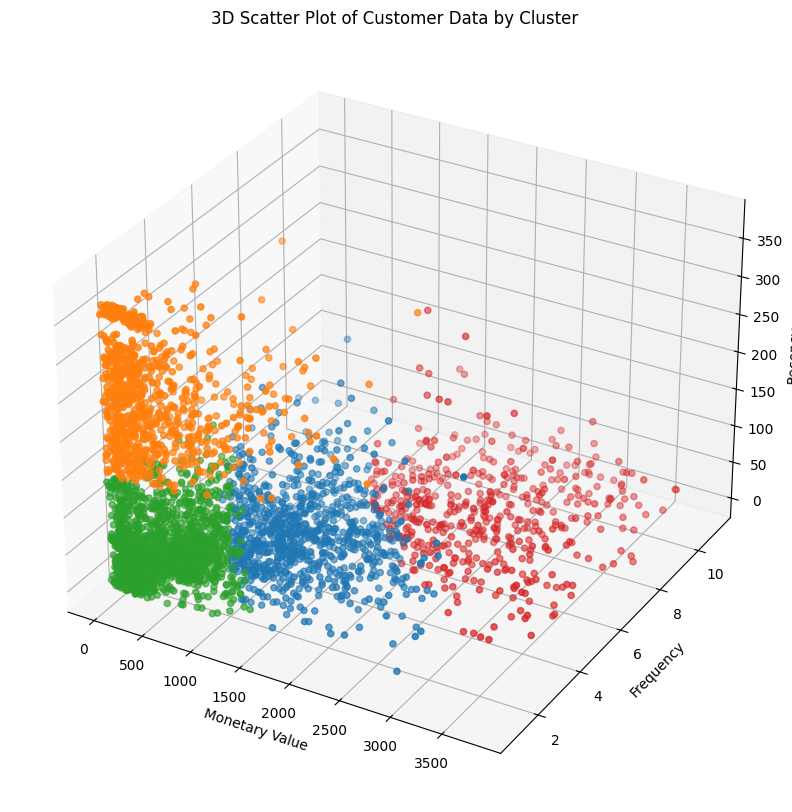

In [ ]:
cluster_colors = {0: '#1f77b4',  # Blue
                  1: '#ff7f0e',  # Orange
                  2: '#2ca02c',  # Green
                  3: '#d62728'}  # Red

colors = non_outliers_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(non_outliers_df['MonetaryValue'],
                     non_outliers_df['Frequency'],
                     non_outliers_df['Recency'],
                     c=colors,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()


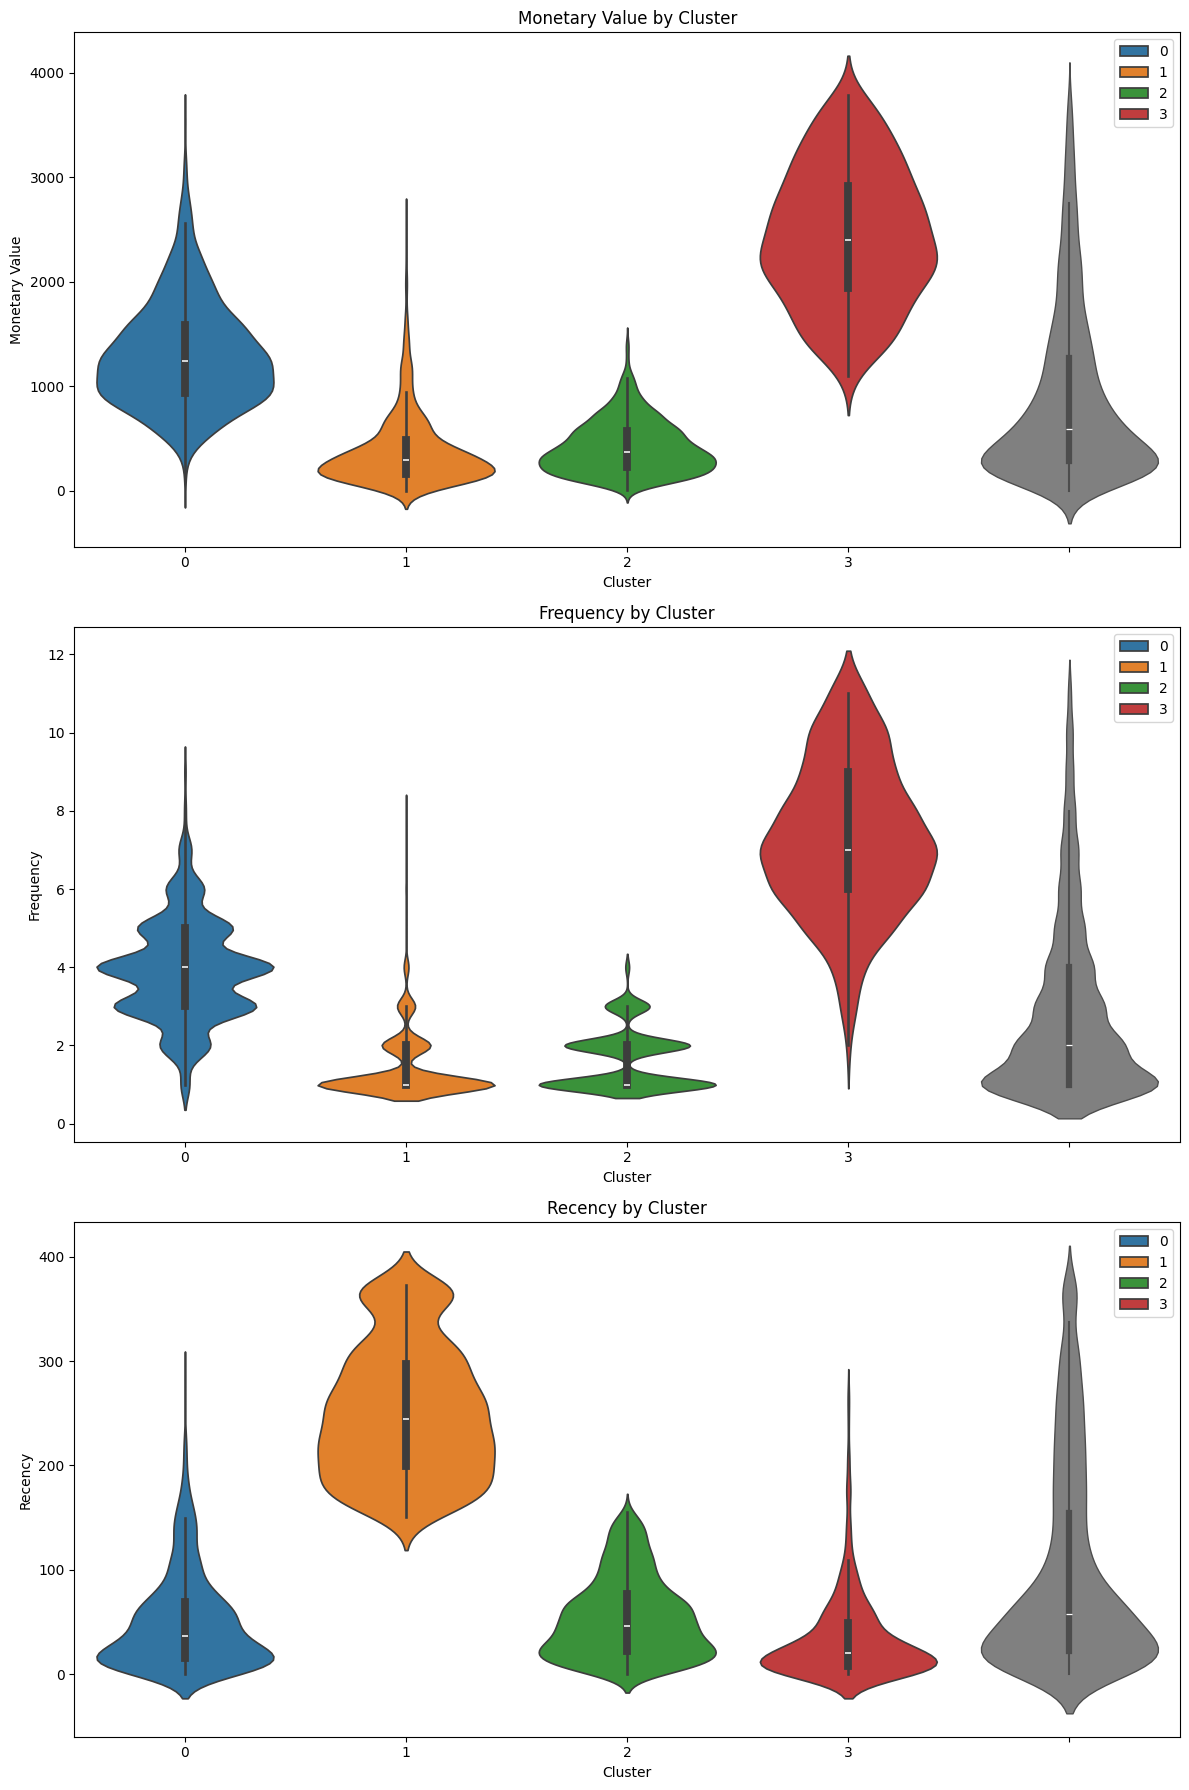

In [ ]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['MonetaryValue'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Frequency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=non_outliers_df['Cluster'], y=non_outliers_df['Recency'], palette=cluster_colors, hue=non_outliers_df["Cluster"])
sns.violinplot(y=non_outliers_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()



1. **Cluster 0 (Blue): "Retain"**
Rationale: This cluster represents high-value customers who purchase regularly, though not always very recently. The focus should be on retention efforts to maintain their loyalty and spending levels.

Action: Implement loyalty programs, personalized offers, and regular engagement to ensure they remain active
2. **Cluster 1 (Orange): "Re-Engage"**
Rationale: This group includes lower-value, infrequent buyers who haven’t purchased recently. The focus should be on re-engagement to bring them back into active purchasing behavior.

Action: Use targeted marketing campaigns, special discounts, or reminders to encourage them to return and purchase again
3. **Cluster 2 (Green): "Nurture"**
Rationale: This cluster represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing to increase their engagement and spending.

Action: Focus on building relationships, providing excellent customer service, and offering incentives to encourage more frequent purchases
4. **Cluster 3 (Red): "Reward"**
Rationale: This cluster includes high-value, very frequent buyers, many of whom are still actively purchasing. They are your most loyal customers, and rewarding their loyalty is key to maintaining their engagement.

Action: Implement a robust loyalty program, provide exclusive offers, and recognize their loyalty to keep them engaged and satisfied.



**Summary of Cluster Names:**


*   Cluster 0 (Blue): "Retain"
*   Cluster 1 (Orange): "Re-Engage"
*   Cluster 2 (Green): "Nurture"
*   Cluster 3 (Red): "Reward"






# **Outliers Analysis**

**Removing Overlapping** **Variables**

In [ ]:
overlap_indices = monetary_outliers_df.index.intersection(frequency_outliers_df.index)
overlap_indices

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=226)

In [ ]:
monetary_only_outliers = monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers = frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers = monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["Cluster"] = -1
frequency_only_outliers["Cluster"] = -2
monetary_and_frequency_outliers["Cluster"] = -3

outlier_clusters_df = pd.concat([monetary_only_outliers, frequency_only_outliers, monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.0,11229.99,1,2010-11-16 10:05:00,23,-1
25,12380.0,4782.84,4,2010-08-31 14:54:00,100,-1
42,12409.0,12346.62,4,2010-10-15 10:24:00,55,-1
48,12415.0,19468.84,4,2010-11-29 15:07:00,10,-1
61,12431.0,4145.52,11,2010-12-01 10:03:00,8,-1
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


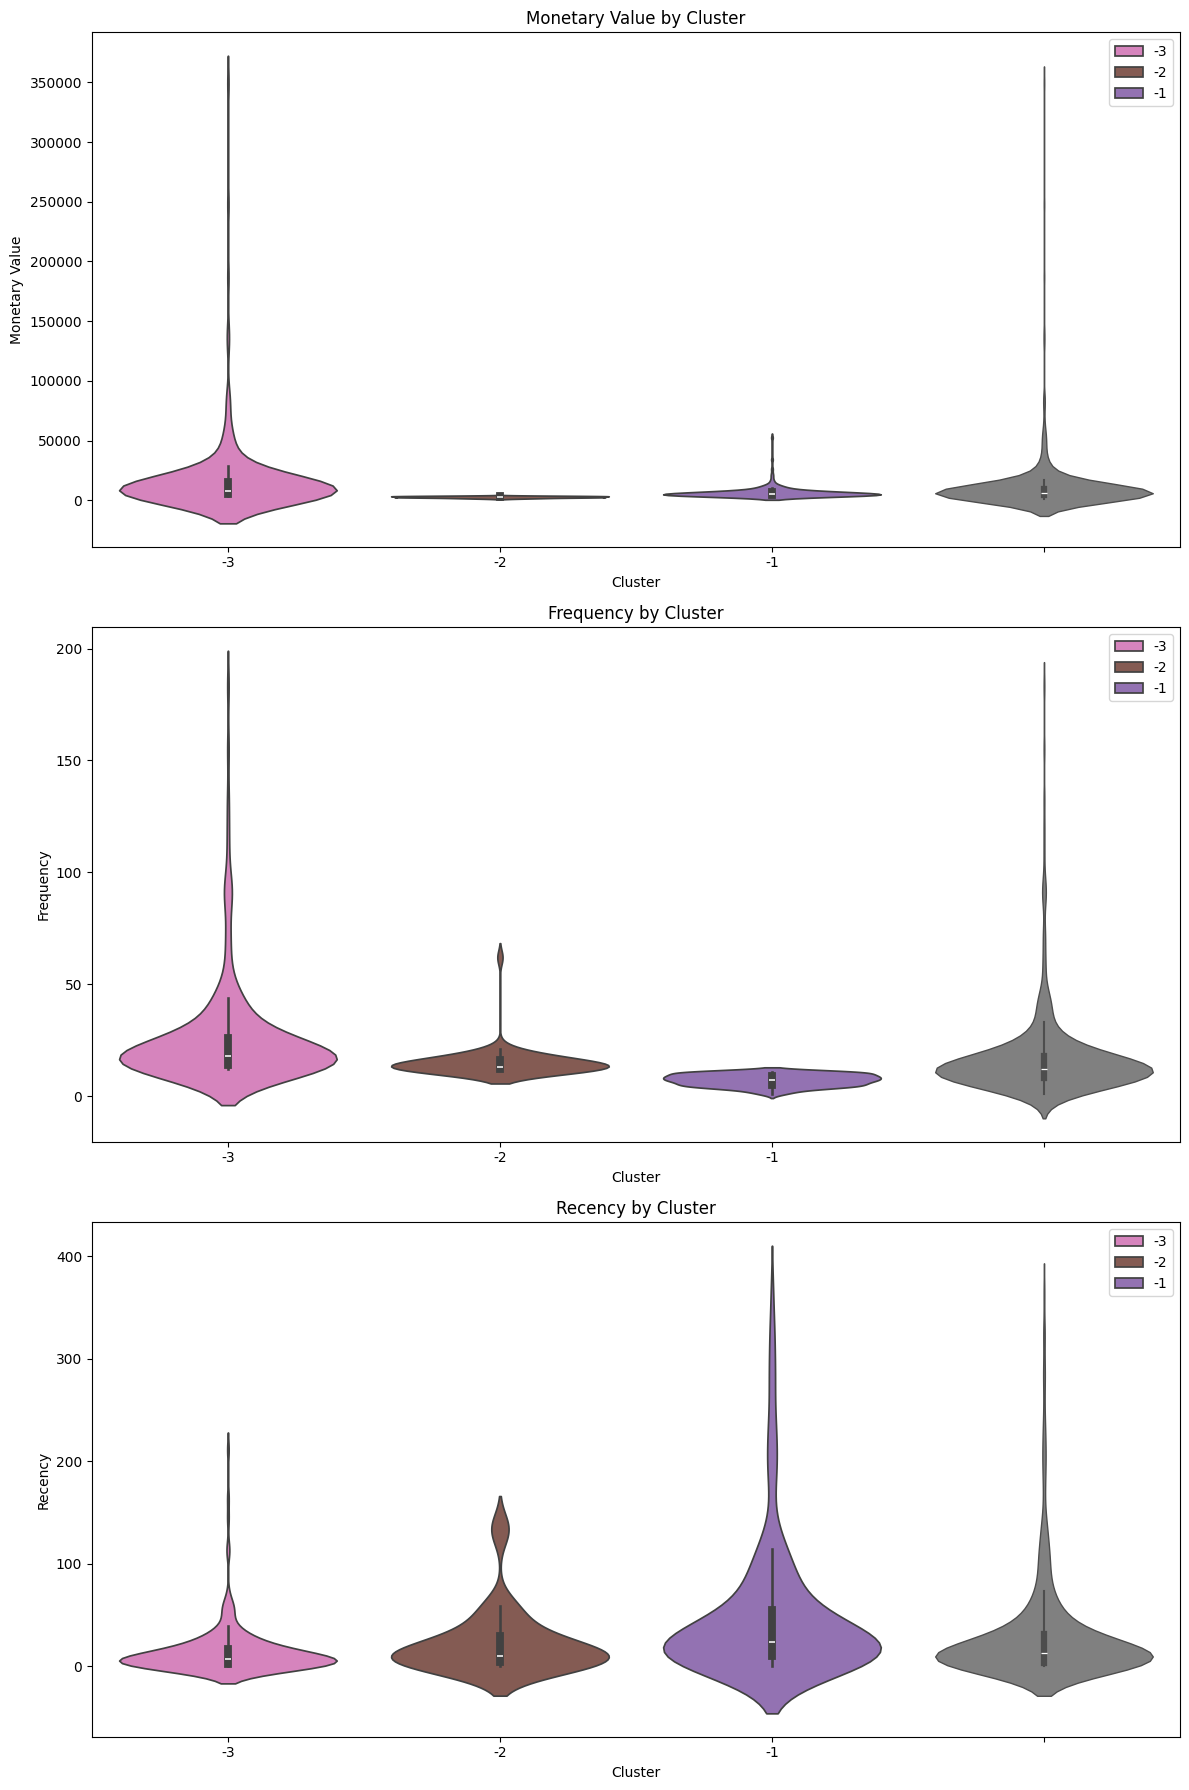

In [ ]:
cluster_colors = {-1: '#9467bd',
                  -2: '#8c564b',
                  -3: '#e377c2'}

plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['MonetaryValue'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Frequency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3, 1, 3)
sns.violinplot(x=outlier_clusters_df['Cluster'], y=outlier_clusters_df['Recency'], palette=cluster_colors, hue=outlier_clusters_df["Cluster"])
sns.violinplot(y=outlier_clusters_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

1. Cluster -1 **(Monetary Outliers) PAMPER**: Characteristics: High spenders but not necessarily frequent buyers. Their purchases are large but infrequent.

Potential Strategy: Focus on maintaining their loyalty with personalized offers or luxury services that cater to their high spending capacity.

2. **Cluster -2 (Frequency Outliers) UPSELL**: Characteristics: Frequent buyers who spend less per purchase. These customers are consistently engaged but might benefit from upselling opportunities.

Potential Strategy: Implement loyalty programs or bundle deals to encourage higher spending per visit, given their frequent engagement.

3. **Cluster -3 (Monetary & Frequency Outliers) DELIGHT**: Characteristics: The most valuable outliers, with extreme spending and frequent purchases. They are likely your top-tier customers who require special attention.

Potential Strategy: Develop VIP programs or exclusive offers to maintain their loyalty and encourage continued engagement.

In [ ]:
cluster_labels = {
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

In [ ]:
#Unioning df of both outliers and non outlers to get the full data set with all the cluster lables applied

full_clustering_df = pd.concat([non_outliers_df, outlier_clusters_df])
full_clustering_df


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3


In [ ]:
#mapping cluster labels
full_clustering_df["ClusterLabel"] = full_clustering_df["Cluster"].map(cluster_labels)

full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterLabel
0,12346.0,169.36,2,2010-06-28 13:53:00,164,1,RE-ENGAGE
1,12347.0,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.0,221.16,1,2010-09-27 14:59:00,73,2,NURTURE
3,12349.0,2221.14,2,2010-10-28 08:23:00,42,0,RETAIN
4,12351.0,300.93,1,2010-11-29 15:23:00,10,2,NURTURE
...,...,...,...,...,...,...,...
4235,18223.0,7516.31,12,2010-11-17 12:20:00,22,-3,DELIGHT
4236,18225.0,7545.14,15,2010-12-09 15:46:00,0,-3,DELIGHT
4237,18226.0,6650.83,15,2010-11-26 15:51:00,13,-3,DELIGHT
4241,18231.0,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT


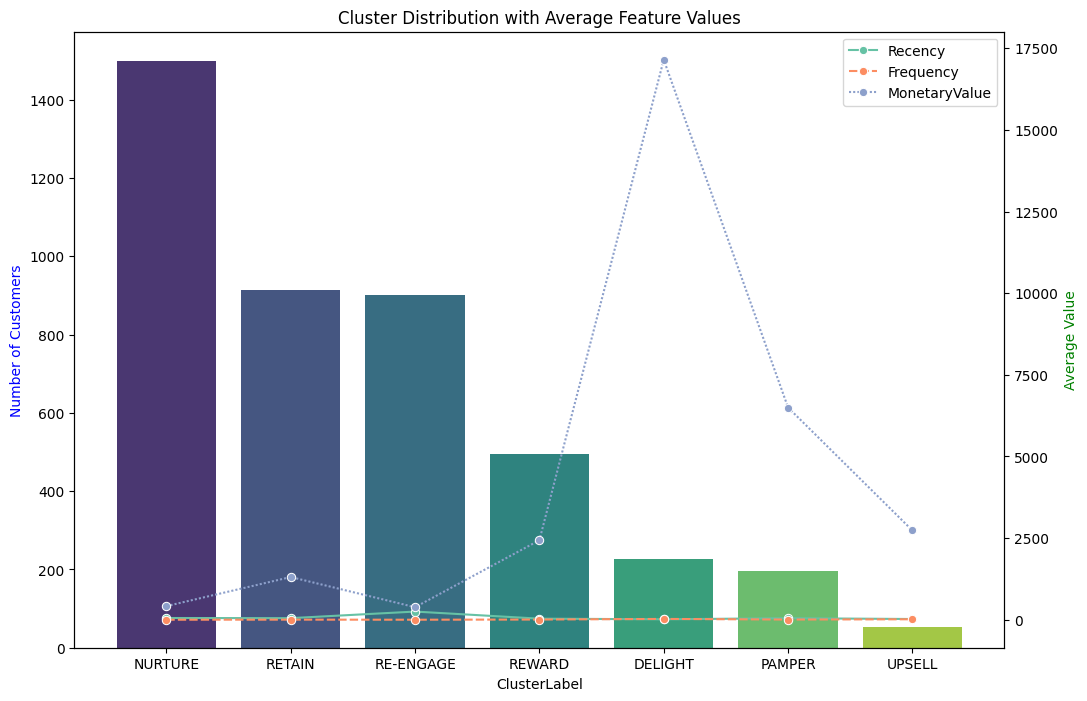

In [ ]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()

feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()

Here we can see that the line of monetary value is quite larger than other inorder to decrease the line we divide by 100

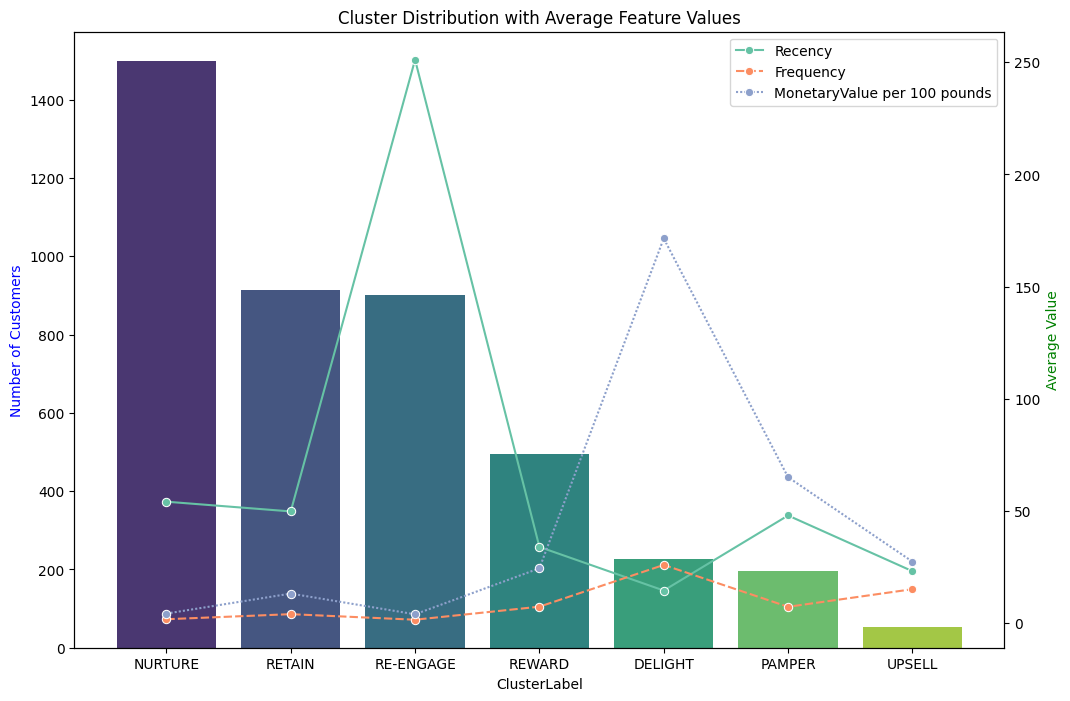

In [ ]:
cluster_counts = full_clustering_df['ClusterLabel'].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"] = full_clustering_df["MonetaryValue"] / 100.00
feature_means = full_clustering_df.groupby('ClusterLabel')[['Recency', 'Frequency', 'MonetaryValue per 100 pounds']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()

**Key Insights:**

**1. Cluster Sizes:**

* The "NURTURE" cluster has the largest number of customers, indicating it's a significant segment.
* "RETAIN" and "RE-ENGAGE" also have a considerable number of customers.
* "DELIGHT," "PAMPER," and "UPSELL" have relatively smaller customer bases.

**2. Recency:**

* "RE-ENGAGE" and "PAMPER" clusters show the highest average recency, suggesting these customers haven't made recent purchases.
* "RETAIN" and "NURTURE" have moderate recency, indicating regular engagement.
* "REWARD" and "DELIGHT" have the lowest recency, suggesting these customers have made recent purchases.

**3. Frequency:**

* "NURTURE" and "RETAIN" clusters have higher average frequency, indicating these customers purchase more often.
* "RE-ENGAGE" and "PAMPER" have lower average frequency, suggesting less frequent purchases.
* "REWARD" and "DELIGHT" have moderate frequency.

**4. Monetary Value:**

* "DELIGHT" and "PAMPER" clusters have the highest average monetary value per 100 pounds, indicating these customers spend more per purchase.
* "NURTURE" and "RETAIN" have moderate average monetary value.
* "RE-ENGAGE" and "UPSELL" have lower average monetary value.

**Cluster Interpretation:**

* **NURTURE:** Large segment of customers with moderate recency, frequency, and monetary value. These customers require nurturing to increase their engagement and spending.

* **RETAIN:** Similar to "NURTURE" but with slightly higher frequency and recency, indicating a more engaged segment that needs to be retained.

* **RE-ENGAGE:** Low recency and frequency, indicating a need to re-engage these customers who have become less active.

* **REWARD:** High recency and moderate frequency, suggesting recent activity and potential for further engagement with rewards.

* **DELIGHT:** High recency, moderate frequency, and high monetary value, indicating highly engaged and valuable customers who can be delighted with exclusive offers.

* **PAMPER:** High recency, low frequency, and high monetary value, suggesting occasional high-spending customers who require special attention and pampering.

* **UPSELL:** Low recency, low frequency, and low monetary value, indicating a segment that requires significant effort to re-engage and increase their value.

**Further Analysis:**

* Analyzing customer demographics, purchase history, and other relevant attributes within each cluster can provide deeper insights into customer behavior.
* These insights can be used to tailor marketing campaigns, customer retention strategies, and product recommendations for each cluster.

In [ ]:

import pandas as pd

# Assuming your DataFrame is named 'full_clustering_df'
file_path = 'Retail Customers  Analysis'  # File will be saved in the current Colab working directory
full_clustering_df.to_csv(file_path, index=False)

print(f'DataFrame saved to: {file_path}')

DataFrame saved to: Retail Customers  Analysis


In [ ]:
from google.colab import files
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>